#### Problem Statement
##### HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

##### After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

#### 1) Now as data analyst we need to categorise countries using socio- economic and health factors that determine the overall development of the country
#### 2) Also need to suggest the countries for which we need to project to managment which needs to be focused on the most.

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Checking for Hopkins Statistic
5. Clustering
6. Modelling
7. Final analysis of the data
8. Recommendations


In [1]:
# To Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## To import required libraries/packages for analysis

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1) 
## Visualisation packages

import matplotlib.pyplot as plt
import seaborn as sns

##importing required libraries for clustering,hopkins
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from random import sample
from numpy.random import uniform
from math import isnan


In [3]:
country = pd.read_csv('Country-data.csv') ## Reading CSV data file into variable country (dataframe)

In [4]:
country.head(10)  ## Display top 10 records in the data frame country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [5]:
data_dict = pd.read_csv('data-dictionary+.csv') ## Checking Data Dictionary file for definitions 

In [6]:
data_dict ## Display data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [7]:
country.shape  ## checking the no. of rows & columns or dimensions of the data frame 

(167, 10)

In [8]:
country.info()  ## Visualising consise information on dataframe such as columns data types and Index range etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
country.describe()  ## To get the statistical information of the numerical columns of  dataframe

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
country.isnull().sum()  ## Check for null values 

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Note: We could see there are no null values in the data frame. Hence null values treatment is not required on the dataframe

In [11]:
country.nunique() ## nunique is fucntion to identify the unique values in the dataframe column wise

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [12]:
country.dtypes ## Get the columns data types of dataframe

country       object 
child_mort    float64
exports       float64
health        float64
imports       float64
income        int64  
inflation     float64
life_expec    float64
total_fer     float64
gdpp          int64  
dtype: object

#### Note: By observing the dtypes and nunique results we could understand there is no change required for data types

Note: To check for any countries which have duplicates in the dataframe. It is important to check because it may lead to false results 

In [13]:
## Duplicated is a python function which can have subset (means the cols) and keep variable needs to set first,except first rest will be considered as duplicate
country.duplicated(subset = ['country'], keep = 'first')    
country.duplicated(subset = ['country'], keep = 'first').sum()

0

#### Note: We could see there are no duplicates in the country column of data frame

In [14]:
## Checking for spellings
list(country.country)

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Ita

#### Note: We could see there are no spelling mistakes in the country column

## Visualisations

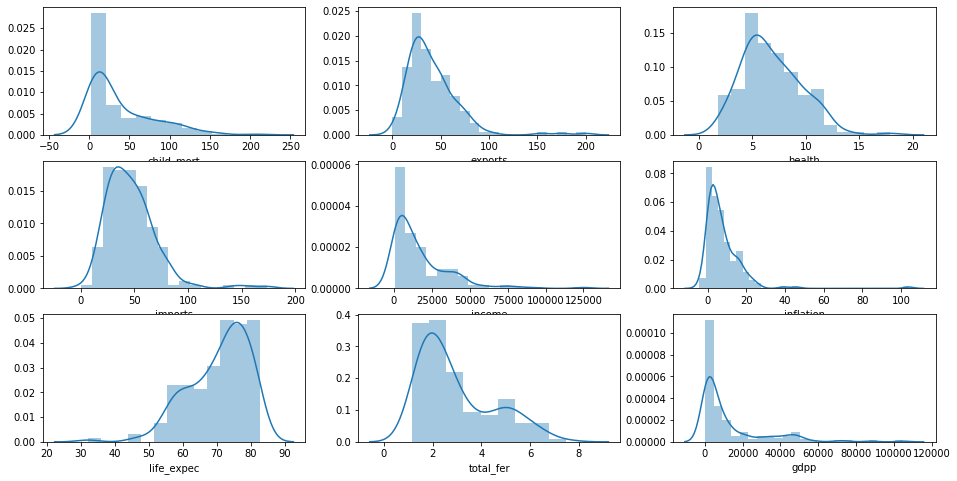

In [15]:
## Looking the data & columns( distributions )
plt.figure(figsize = (16,8))
feature = country.columns[1:]

for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(country[i[1]])

**Observations:** 
1. We could see the most of the data for life expentency present from 50-80
2. For Exports column, the data resided between 0 and 100.

### Checking for Outliers on the data frame

In [16]:
## describe function gives the statistical information on numerical columns.To observe the significant checking outliers at these points 25%,50%,75%,90%,95% and 99%
country.describe(percentiles=[.25,.5,.75,.90,.95,.99])  

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


#### Note: Even though numerical statistics, it is best to visulaise these outliers in graphical Boxplots for better illustration

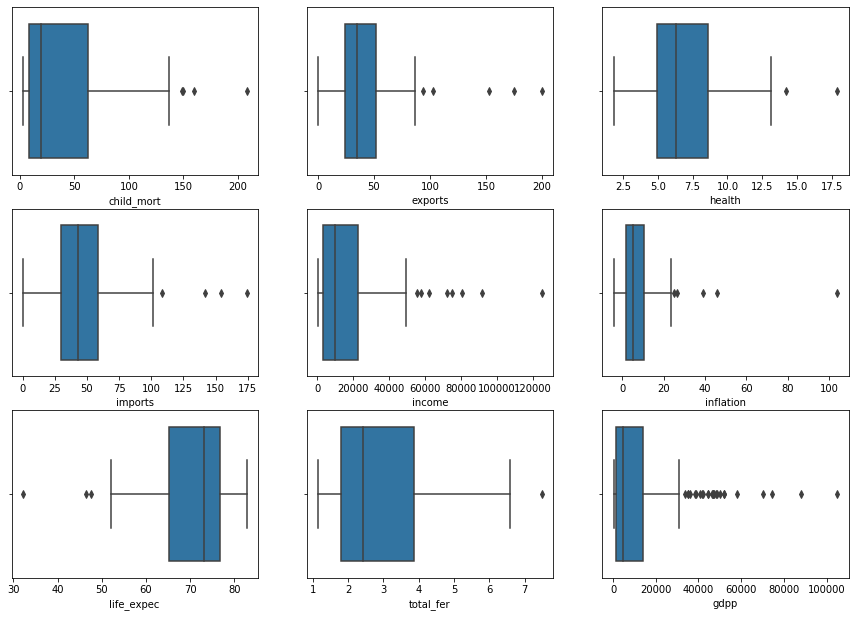

In [17]:
## Function to create Boxplot for numerical columns for checking outliers 
def Outlier_graph():
    plt.figure(figsize = (15,10.5))
    feature = country.columns[1:]
    for i in enumerate(feature):
        plt.subplot(3,3, i[0]+1)
        sns.boxplot(country[i[1]])
Outlier_graph()   ## Calling Outlier Function

In [18]:
country.head()   ### Inspecting data frame is best practise 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [19]:
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


### As per Data dictionary provided we could see the values of exports,health and imports are given as percentage of gdpp. We need to convert actual values because
### we can observe in health column and first two rows have approximately near values where as compared with their gdpp it is way large. Hence it is necessary to convert to actual values by simple maths

In [20]:
### Converting the exports,health and imports column values to actual values.
country['exports'] = country['exports']/100 * country['gdpp']
country['health'] = country['health']/100 * country['gdpp']
country['imports'] = country['imports']/100 * country['gdpp']

In [21]:
country.head(10)  ### Checking dataframe after changes implementation

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840


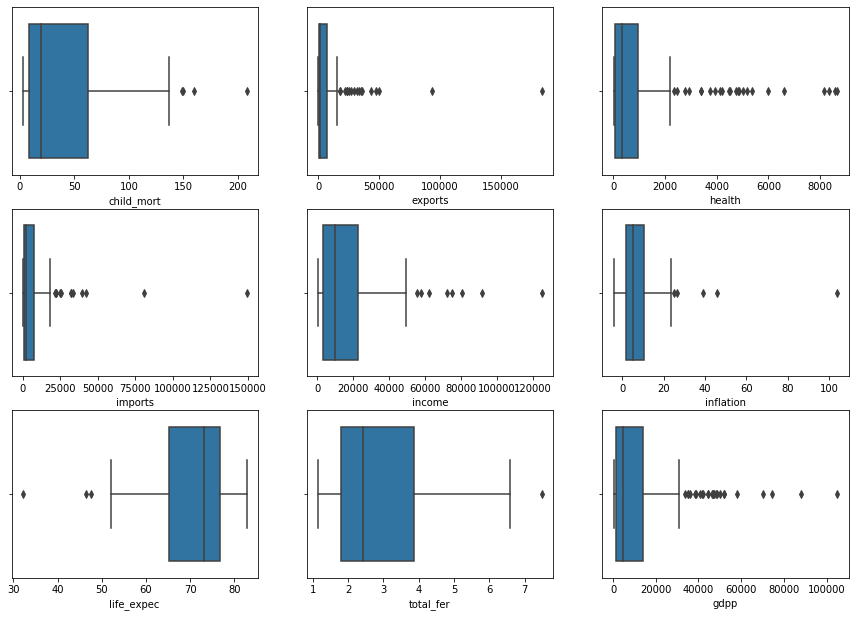

In [22]:
## Lets visulaise the outliers again for illustration
Outlier_graph() ## Calling outlier function 

#### As we could see there are outliers for the columns by observing the above graphs how ever we should not remove these entries/outliers because of following reasons:
    1) The data set is very small and not recommeded to remove entries
    2) As per problem statement we need to concentrate more on low income,low gdpp and high child mortality values, if we remove we may loose data and end up forming wrong clusters and miss countries which required direct aid. 
#### So it is better not to remove outliers but we can do capping which will be conducted later part of assignment

### Lets visualise columns in the dataframe and draw some inferences 


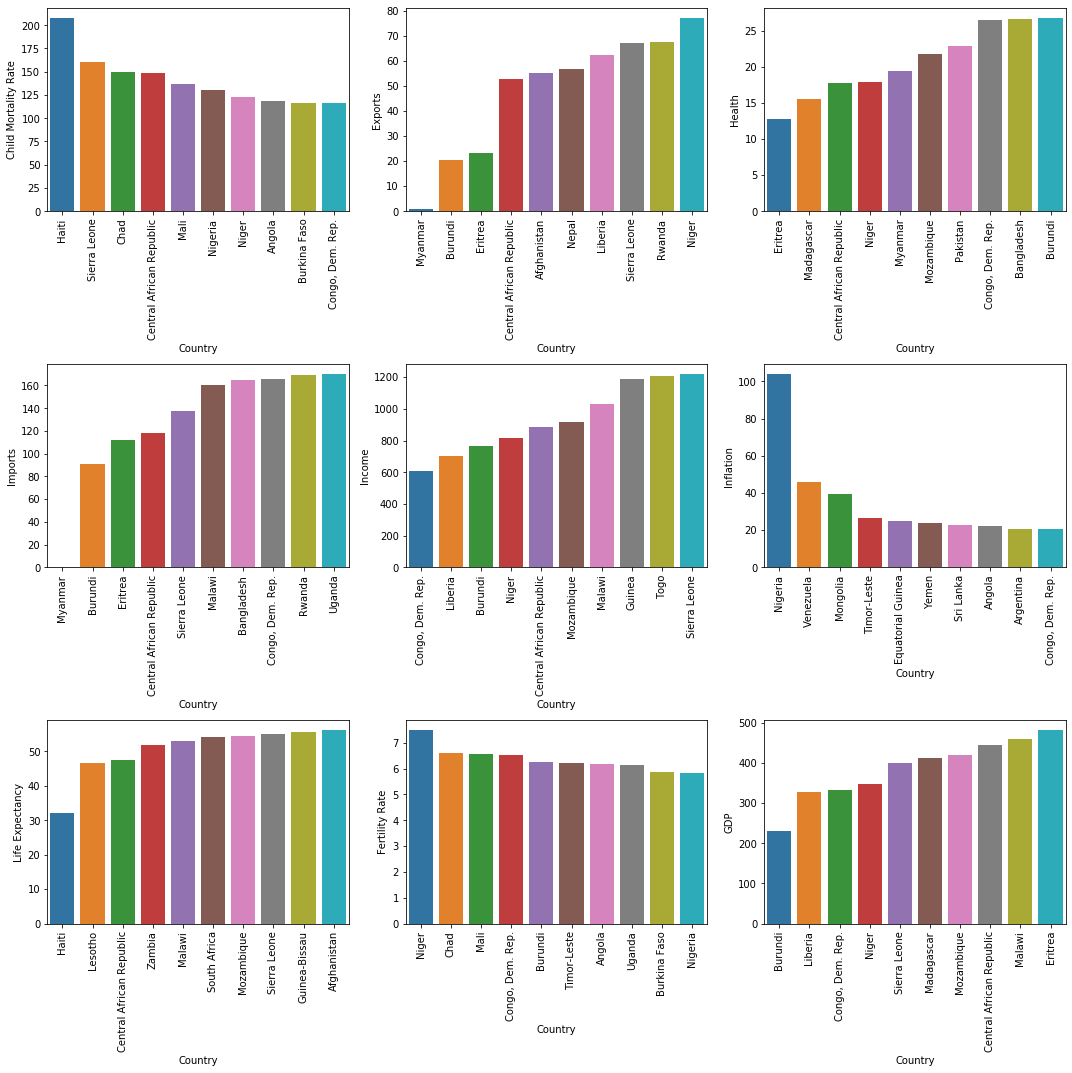

In [23]:
fig, ax = plt.subplots(3,3,figsize = (15,15))


high_child_mortality = country[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= high_child_mortality, ax = ax[0,0])
plt1.set(xlabel = 'Country', ylabel= 'Child Mortality Rate')


low_exports = country[['country','exports']].sort_values('exports', ascending = True).head(10)
plt2 = sns.barplot(x='country', y='exports', data= low_exports, ax = ax[0,1])
plt2.set(xlabel = 'Country', ylabel= 'Exports')


poor_health = country[['country','health']].sort_values('health', ascending = True).head(10)
plt3 = sns.barplot(x='country', y='health', data = poor_health, ax = ax[0,2])
plt3.set(xlabel = 'Country', ylabel= 'Health')


low_imports = country[['country','imports']].sort_values('imports', ascending = True).head(10)
plt4 = sns.barplot(x='country', y='imports', data= low_imports, ax = ax[1,0])
plt4.set(xlabel = 'Country', ylabel= 'Imports')


low_income = country[['country','income']].sort_values('income', ascending = True).head(10)
plt5 = sns.barplot(x='country', y='income', data= low_income, ax = ax[1,1])
plt5.set(xlabel = 'Country', ylabel= 'Income')


inflation = country[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt6 = sns.barplot(x='country', y='inflation', data= inflation, ax = ax[1,2])
plt6.set(xlabel = 'Country', ylabel= 'Inflation')


life_expectancy = country[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt7 = sns.barplot(x='country', y='life_expec', data= life_expectancy, ax = ax[2,0])
plt7.set(xlabel = 'Country', ylabel= 'Life Expectancy')


total_fertility = country[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt8 = sns.barplot(x='country', y='total_fer', data= total_fertility, ax = ax[2,1])
plt8.set(xlabel = 'Country', ylabel= 'Fertility Rate')



low_gdp = country[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt9 = sns.barplot(x='country', y='gdpp', data= low_gdp, ax = ax[2,2])
plt9.set(xlabel = 'Country', ylabel= 'GDP')


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()

**Inferences** :
1. We could see the top 10 countries which have high Child mortality. Haiti has highest child mortality rate around 210.
2. When we observe the graph of income, the net person income of African Countries like Congo, Liberia, Burundi is very low among all countries. So we may consider African countries are in need of aid.
3. The same case for gdpp graph as well
4. Considering health factor, the expenditure per capita is very low in African countries.
5. For Exports for Myanmar (Asian country) is pretty low when compared to other countries also it is less than 20 where other countries are actually starting at least at 20 

### Lets Visualise through Joint plots 

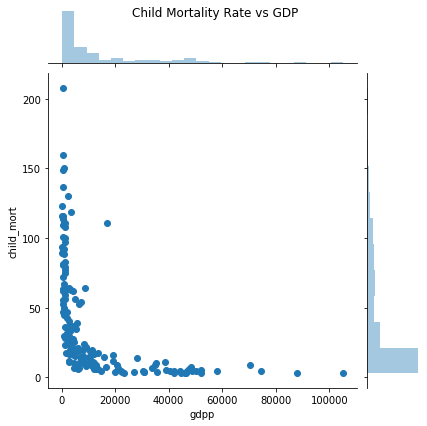

In [24]:
### Lets consider gdp and child mortality rate

p = sns.jointplot(x = 'gdpp', y = 'child_mort', data = country)  ## Consider joint plot for descent illustration
p.fig.suptitle("Child Mortality Rate vs GDP")
plt.show()



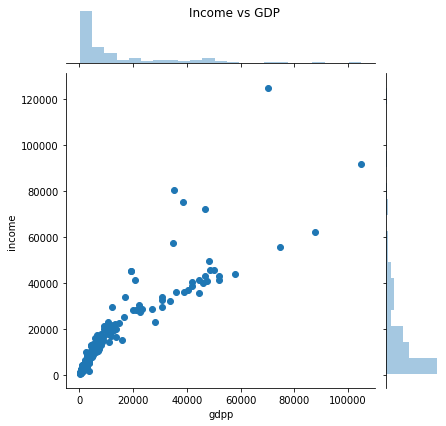

In [25]:
### Lets consider income and child mortality rate
q = sns.jointplot(x = 'gdpp', y = 'income', data = country)  ## Consider joint plot for descent illustration
q.fig.suptitle("Income vs GDP")
plt.show()

**Inferences** : We could observer most of data points are located under child mortality rate 50 and below 20000 gdp. 
                 Also we could some pattern that when gdp increases ,child mortatlity rate of country is neglible  

#### Pairplot of all socio-economic features 

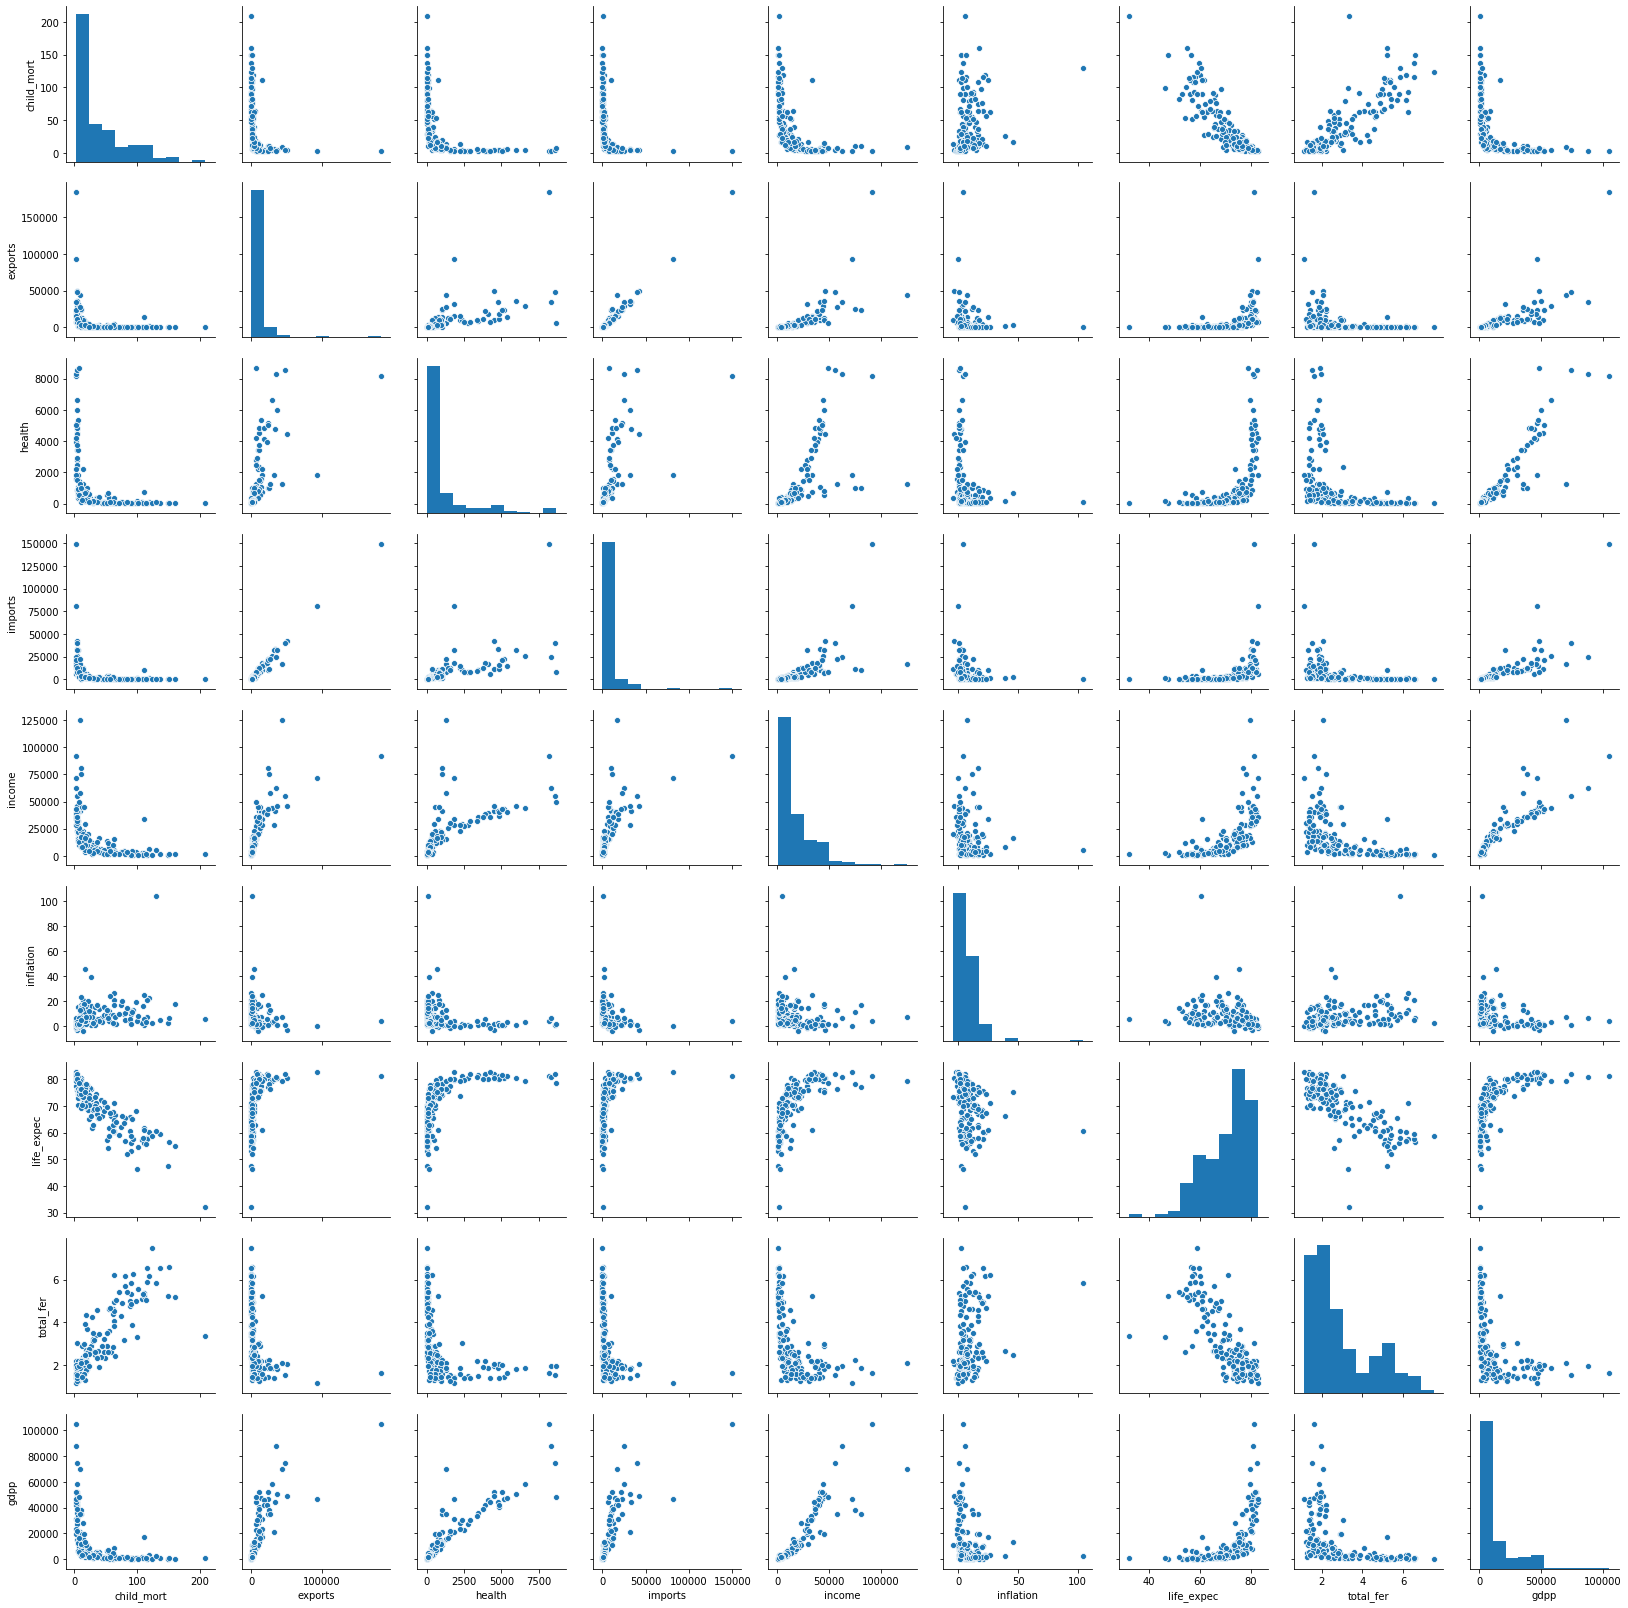

In [26]:
## Lets see both distribution of single factors and relationships between two factors using the pair plot
sns.pairplot(country)
plt.show()

(9.0, 0.0)

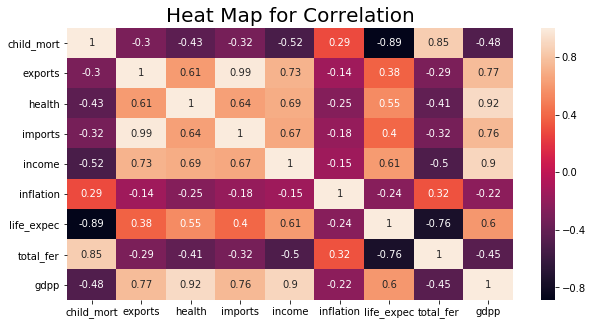

In [27]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (10,5))        
ax = sns.heatmap(country.corr(),annot = True)
plt.title('Heat Map for Correlation',fontsize = 20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


**Inference**: 
1. We could observer child mortality and total fertility are highly correlated positively which can infer that child mortality rate increase so does the total fertility increases with rate **0.85**
2. Also child mortality rate negatively correlated with life expentancy which infer if child mortality increases the life expentancy decreases with rate **0.89** ( as sign is just direction)
3. Exports and imports are highly correlated to each other with **0.99** 
4. Also when exports are good the income per capita is descent in the country

## Lets Prepare Data for Clustering

## 1.Outlier Treatment

Outlier Treatment for clustering is subjective. As mentioned above we can't remove outliers however we can capping as it is best method to avoid data loss, however limiting to the problem statement, Except Child mortality column we can't cap lower range, for Child Mortality rate column, we can't cap higher range. 
Hence considering these capping is done at soft range i.e(1-99)% 


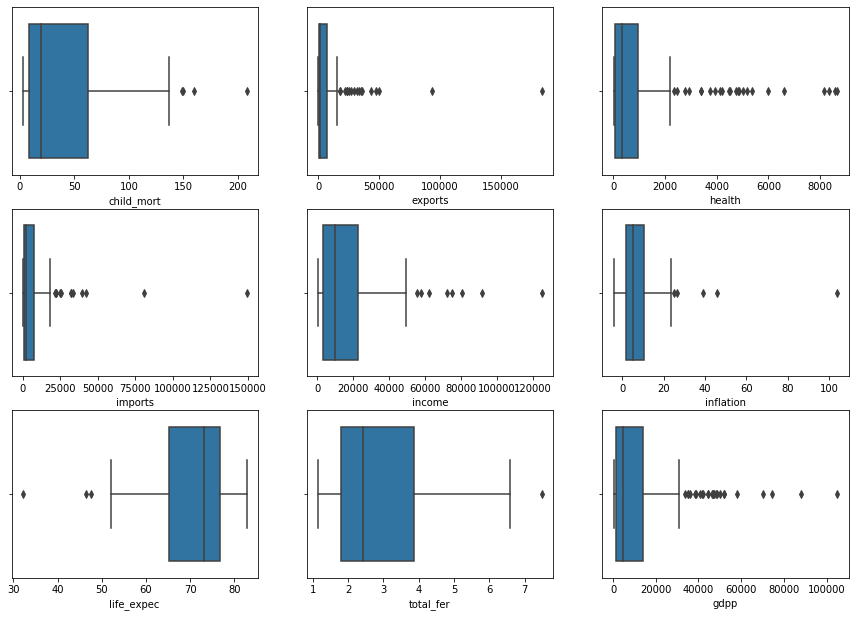

In [28]:
## Lets visulaise the outliers again for illustration 
Outlier_graph() ## Calling outlier function 

In [29]:
# Outlier treatment by capping the outliers 
# Keeping the boundries soft (1-99) subjective each colum so that we dont endup dropping the required countries

## Exports column : Capping higher range, as there are no outliers in lower range. Also it doesn't effect much on our Business Purpose or Problem Statement.

Q4 = country['exports'].quantile(0.99)
country['exports'] [country['exports']  >= Q4]=Q4

## Health column : Capping higher range, as there are no outliers in lower range.
Q4 = country['health'].quantile(0.99)
country['health'] [country['health']  >= Q4]=Q4

## Imports column : Capping higher range, as there are no outliers in lower range. Also it doesn't effect much on our Business Purpose or Problem Statement

Q4 = country['imports'].quantile(0.99)
country['imports'] [country['imports']  >= Q4]=Q4

## Income column : Capping higher range, as there are no outliers in lower range. Also it doesn't effect much on our Business Purpose or Problem Statement

Q4 = country['income'].quantile(0.99)
country['income'] [country['income']  >= Q4]=Q4


## Total Fertility column : Capping higher range, as there are no outliers in lower range. Also it doesn't effect much on our Business Purpose or Problem Statement

Q4 = country['total_fer'].quantile(0.99)
country['total_fer'] [country['total_fer']  >= Q4]=Q4

## GDP : Capping higher range, as there are no outliers in lower range. Also it doesn't effect much on our Business Purpose or Problem Statement

Q4 = country['gdpp'].quantile(0.99)
country['gdpp'] [country['gdpp']  >= Q4]=Q4


In [30]:
country.head()  ## Its always recommeded to examine data after changes

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


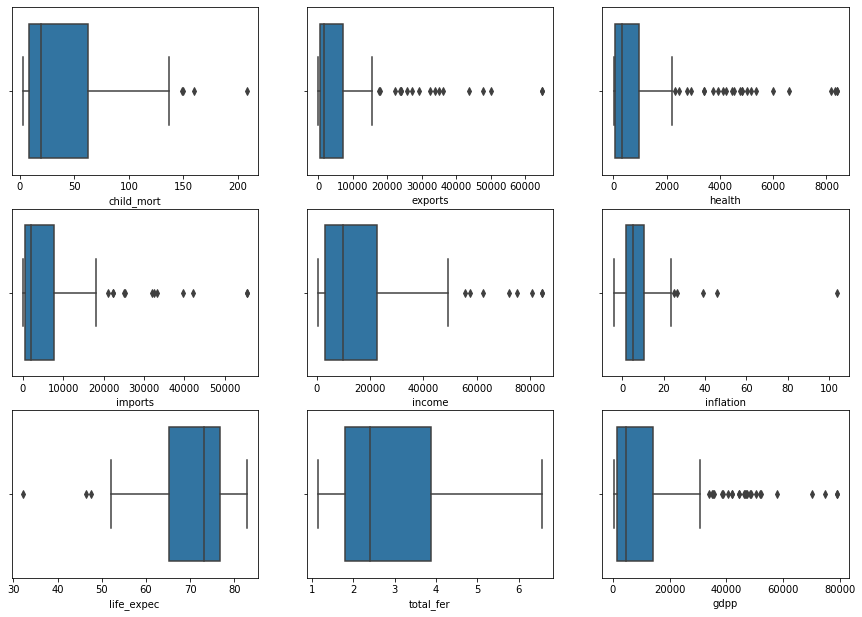

In [31]:
## Lets visulaise the outliers again for illustration
Outlier_graph()

**Note:** We could observe total fertility graph change, however the other columns still have outliers, but it is Ok to have because clustering algorithm will make all these outliers into seperate cluster. 

## Hopkins Statistics Test

In [32]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [33]:
## Hopkins test is one of possible method to check the cluster tendency. If it is close to 1, it means data points have good tendency can be made clusters.
## Also the score is random and changes, so it is good to see the score check multiple teams.
from statistics import mean
score_list = []
for i in range(1,11):
    score_list.append(hopkins(country.drop('country',axis = 1)))

mean(score_list)
    

0.9395239537589373

**>93** is a good Hopkins score for Clustering.

## Scaling Data:
    Scaling is important feature and required for Culstering because clustering techniques generally use Euclidean distance. Using the variables without standardization will give the variable with the larger range. So it is required transformation on data 

In [34]:
scalar = StandardScaler() ## Creating Standard scalar object
country1 = scalar.fit_transform(country.drop('country',axis = 1)) ## Fit and tranform the data country except country column

In [35]:
country1 = pd.DataFrame(country1,columns=country.columns[1:]) # Converting into dataframe and columns as it is in the original data frame

In [36]:
country1.head()  ## Checking head of the newly created Dataframe

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042


**Clustering: As we have good hopkins score and scaled data ready we can go for clustering**
1. K-Means Clustering 
2. Hierarchical Clustering

### K- means Clustering

Finding the optimal number of cluster for K-Means Clustering using following methods.
1. Elbow Curve Method
2. Silhouette Score Method

In [37]:
## First Using Elbow Curve Method

ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country1)  ### Finding KMeans and fitting on country1 data frame.
    ssd.append([k, kmean.inertia_]) ## Appending kmean into ssd list

In [38]:
temp_df = pd.DataFrame(ssd)

In [39]:
temp_df.head()

,0,1
0,2,851.405622
1,3,560.773551
2,4,448.973361
3,5,369.834058
4,6,326.464922


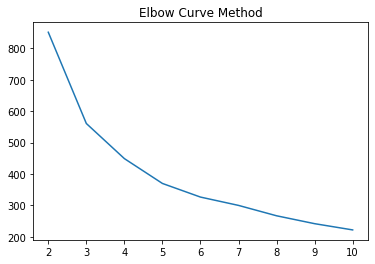

In [40]:

plt.plot(temp_df[0], temp_df[1])
plt.title('Elbow Curve Method')
plt.show()




*Note* : Ideally we won't take 2 as optimal number for clustering for business purpose we would go for 3 clusters.

In [41]:
### Silhouette Score Method
for num_clusters in range(2,11):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4785537433954376
For n_clusters=3, the silhouette score is 0.42330733362616313
For n_clusters=4, the silhouette score is 0.4091396796207265
For n_clusters=5, the silhouette score is 0.4155820343491549
For n_clusters=6, the silhouette score is 0.3065946043940166
For n_clusters=7, the silhouette score is 0.3241215907020328
For n_clusters=8, the silhouette score is 0.2843284577372246
For n_clusters=9, the silhouette score is 0.24938072716166845
For n_clusters=10, the silhouette score is 0.29273571378698016


In [42]:
### Silhouette Score Method in different approach as elbow curve visuals 

ss = []
for k in range(2, 11): 
    kmean = KMeans(n_clusters = k).fit(country1)
    ss.append([k, silhouette_score(country1, kmean.labels_)])

In [43]:
temp_df = pd.DataFrame(ss)    

In [44]:
temp_df.head()

,0,1
0,2,0.478554
1,3,0.423307
2,4,0.409140
3,5,0.415582
4,6,0.306420


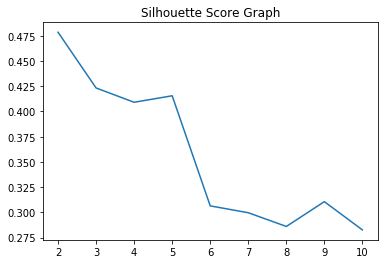

In [45]:
plt.plot(temp_df[0], temp_df[1])
plt.title('Silhouette Score Graph')
plt.show()

*Note*: After observing the above two methods results, let's go with 3 clusters

In [46]:
# K=3
# Final Kmean Clustering
kmean = KMeans(n_clusters = 3, random_state = 100,max_iter=100)  ## Selecting no of clusters 3 and random state 100 and iteration 100 
kmean.fit(country1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [47]:
kmean.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [48]:
country_kmean = country.copy()  ## Creating copy of original data frame

In [49]:
label  = pd.DataFrame(kmean.labels_, columns= ['Cluster ID']) ## Creating label data frame for assigning labels with name CLuster ID
label.head()

,Cluster ID
0,2
1,0
2,0
3,2
4,0


In [50]:
country_kmean = pd.concat([country_kmean, label], axis =1) ## Appending Label Data frame to country_kmean and making complete data frame with cluster number

In [51]:
country_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [52]:
country_kmean['Cluster ID'].value_counts()  ## Checking the count of each clusters 

0    92
2    48
1    27
Name: Cluster ID, dtype: int64

## Visualize the clusters & Cluster Profiling

As per Business Problem Statement we need to select the coutries which required direct aid and for that considering the GDP, INCOME and CHILD MORTALITY RATE

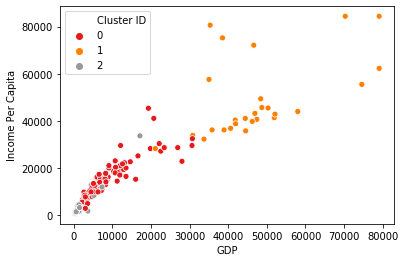

In [53]:
## Plotting scatter plot to see the datapoints with GDP and INCOME
## Graph GDP vs INCOME
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'Cluster ID', data = country_kmean, palette = 'Set1')
plt.ylabel('Income Per Capita')
plt.xlabel('GDP')
plt.legend()
plt.show()

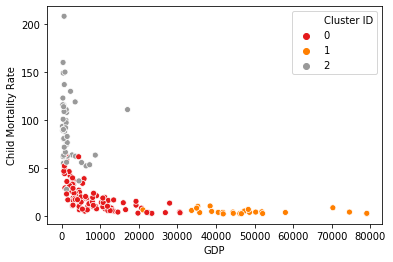

In [54]:
## Plotting scatter plot to see the datapoints with GDP and CHILD MORTALITY RATE
## Graph GDP vs CHILD MORTALITY RATE
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'Cluster ID', data = country_kmean, palette = 'Set1')
plt.ylabel('Child Mortality Rate')
plt.xlabel('GDP')
plt.legend()
plt.show()

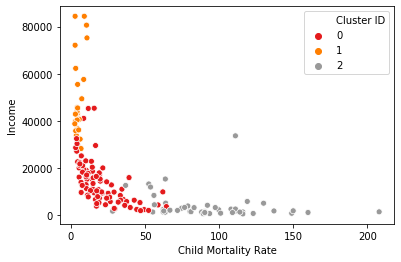

In [55]:
## Plotting scatter plot to see the datapoints with Income and CHILD MORTALITY RATE
## Graph Income vs CHILD MORTALITY RATE
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'Cluster ID', data = country_kmean, palette = 'Set1')
plt.ylabel('Income')
plt.xlabel('Child Mortality Rate')
plt.legend()
plt.show()

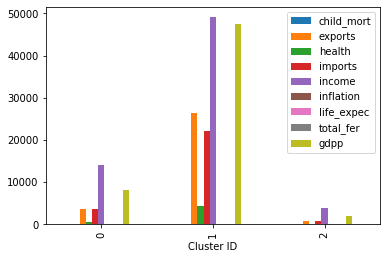

In [56]:
## Plotting all the factors using Bar plot and agg func mean
country_kmean.drop('country', axis = 1).groupby('Cluster ID').mean().plot(kind = 'bar')
plt.show()

Note: By observing above graph, it is difficult to visualize the inference. Let's plot the graph considering the above mentioned factors

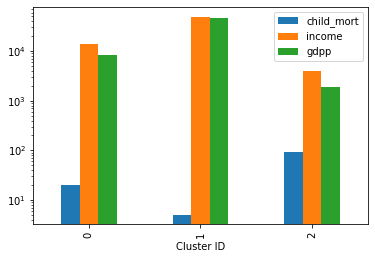

In [57]:
## Ploting the graph with CHILD MORTALITY RATE, GDP AND INCOME
country_kmean[['child_mort','income', 'gdpp','Cluster ID']].groupby('Cluster ID').mean().plot(kind = 'bar')
plt.yscale("log")
plt.show()

**Inferences**:
By the problem statement we need to consider the **low GDP, Low INCOME & High Mortality Rate.**                                                                                                 
1. As per above graph, the cluster 2 has high **child mortality** when compared to other clusters.
2. Considering the income values,it is also cluster 2 with low **income** compared to other clusters.
3. Also **GDP** values observered are also same case like above

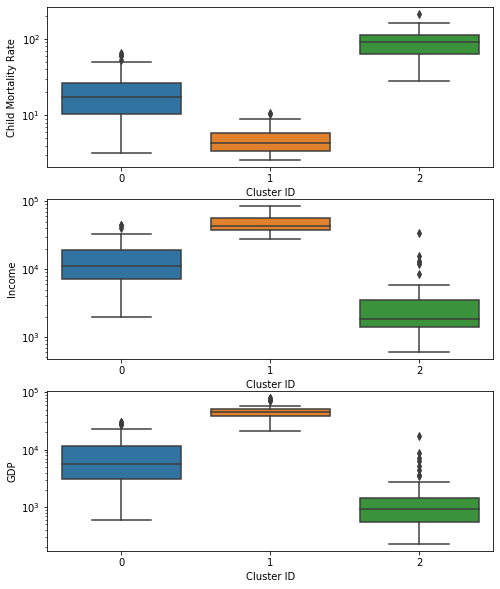

In [58]:
# Box plot on Original attributes to visualize the spread of the data

plt.figure(figsize=(8,10))

plt.subplot(3,1,1)
plt.yscale("log")
sns.boxplot(x = 'Cluster ID', y = 'child_mort', data = country_kmean)
plt.ylabel('Child Mortality Rate')

plt.subplot(3,1,2)
plt.yscale("log")
sns.boxplot(x = 'Cluster ID', y = 'income', data = country_kmean)
plt.ylabel('Income')

plt.subplot(3,1,3)
plt.yscale("log")
sns.boxplot(x = 'Cluster ID', y = 'gdpp', data=country_kmean)
plt.ylabel('GDP')


plt.show()

#### Inference:

- Same observations we could observe when drawn plots for actual data

- Child Mortality is highest for Cluster 2.These clusters need some aid.

- Income and GDP are development measures. Higher the per capita income and GDP better is the country's development.
  Income per capita and GDP seems lowest for countries in clusters 2. Hence, these countries need some help.
  
  **We will be going with Cluster-2**

In [59]:
## Sorting values with GDP, INCOME and CHILD MORTALITY RATE
kmeans_results = country_kmean[country_kmean['Cluster ID'] == 2].sort_values(by = ['gdpp','income','child_mort'], ascending = [True,True,False])

In [60]:
kmeans_results

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.0200,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.8,4.6000,413.0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.5600,419.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.3100,459.0,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.6100,482.0,2


Since we need to select atleast 5 countries we are selecting top 5 records in the data frame

In [61]:
kmeans_results.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2


Now lets apply Hierarchial Clustering to see if we get any better clusters or not.

## Hierarchical Clustering

In [62]:
country_df = country.copy()  ## Creating copy of original data frame 

In [63]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [64]:
country1.head()  ### taking scaled dataframe to apply Hierarical clustering algorithm

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042


**Single Linkage:**

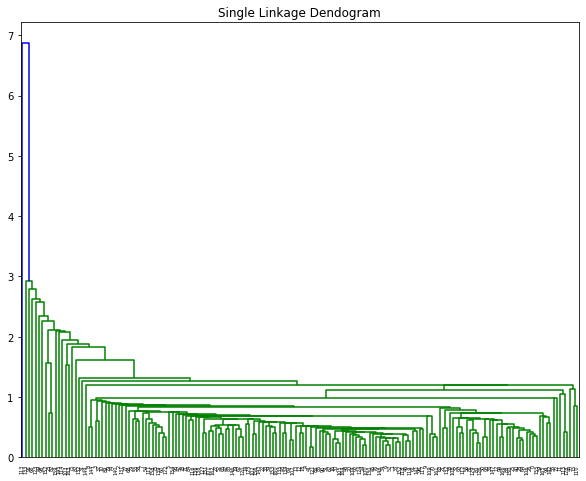

In [65]:
plt.figure(figsize=(10,8))
mergings = linkage(country1, method='single',metric='euclidean') ## Using linkage method from scipy library cluster module
dendrogram(mergings)   ## Using dendogram method for created mergings
plt.title('Single Linkage Dendogram')
plt.show()

**Interfere**: We can't visualise the plot and interpret as it goes on agglomerative way in which at each step combines the custer. Also by color visual we could see blue and green colors. Let's visual other linkages 

**Complete Linkage**

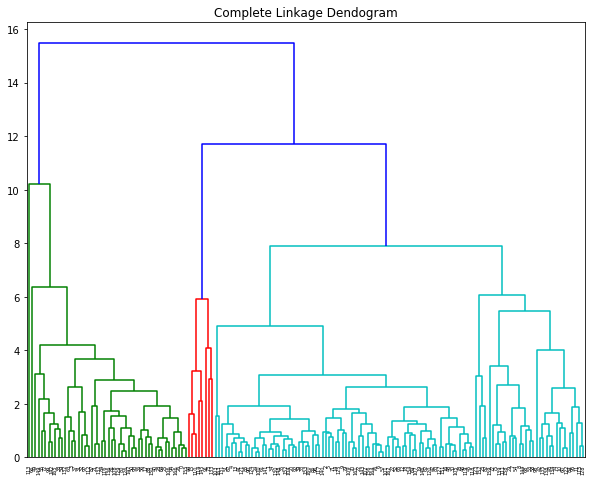

In [66]:
plt.figure(figsize=(10,8))
mergings = linkage(country1, method="complete", metric='euclidean') ## Using linkage method from scipy library cluster module
dendrogram(mergings) ## Using dendogram method for created mergings
plt.title('Complete Linkage Dendogram')

plt.show()

Based on observations on single and complete linkage, complete linkage have clear visuals than the single linkage. So choosing complete linkage

In [67]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, ) ## Assigning cluster labels by cutting the dendogram with 3 clusters
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [68]:
len(cluster_labels)  ## Checking count of cluster labels

167

In [69]:
country_df['Cluster ID'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [70]:
country_df['Cluster ID'].value_counts()  ## Count for each clusters which are formed 

1    111
0    48 
2    8  
Name: Cluster ID, dtype: int64

Text(0.5, 0, 'GDP')

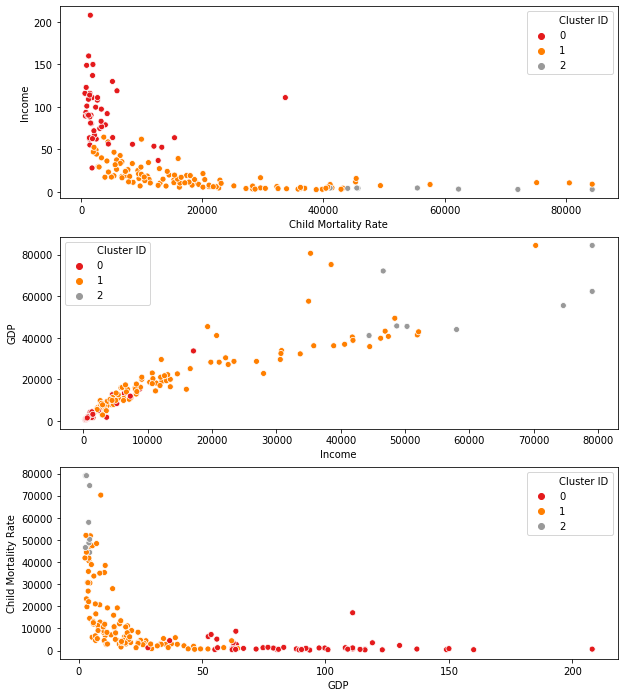

In [71]:
# Scatter plot on Original attributes to visualize the spread of the data
plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster ID',data = country_df,legend='full',palette="Set1")
plt.ylabel('Income')
plt.xlabel('Child Mortality Rate')
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster ID', data = country_df,legend='full',palette="Set1")
plt.ylabel('GDP')
plt.xlabel('Income')
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster ID', data=country_df,legend='full',palette="Set1")
plt.ylabel('Child Mortality Rate')
plt.xlabel('GDP')

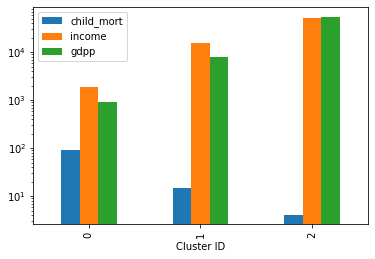

In [72]:
## Ploting Bar graph for the decided variables which are considered important
country_df[['child_mort','income', 'gdpp','Cluster ID']].groupby('Cluster ID').median().plot(kind = 'bar')
plt.yscale("log")

**Inferences**:
By the problem statement we need to consider the **low GDP, Low INCOME & High Mortality Rate.**                                                                                                 
1. As per above graph, the cluster 0 has high **child mortality** when compared to other clusters.
2. Considering the income values,it is also cluster 0 with low **income** compared to other clusters.
3. Also **GDP** values observered are also same case like above

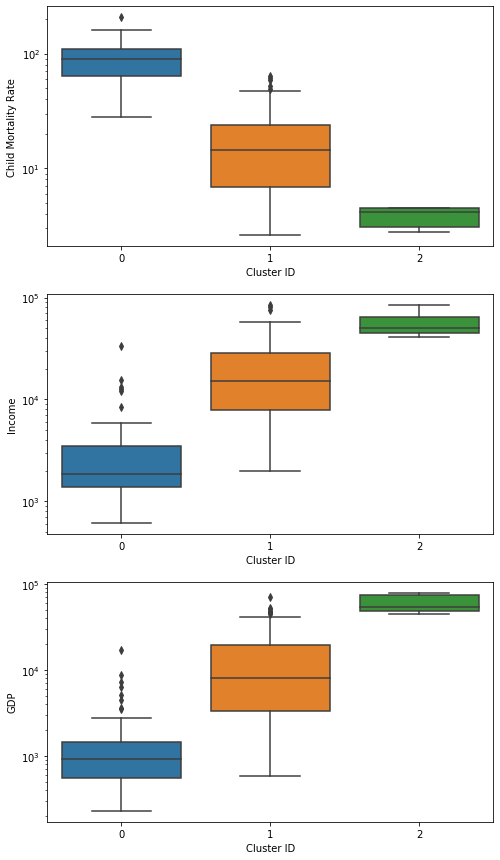

In [73]:
plt.figure(figsize=(8,15))

plt.subplot(3,1,1)
plt.yscale("log")
sns.boxplot(x = 'Cluster ID', y = 'child_mort', data = country_df)
plt.ylabel('Child Mortality Rate')

plt.subplot(3,1,2)
plt.yscale("log")
sns.boxplot(x = 'Cluster ID', y = 'income', data = country_df)
plt.ylabel('Income')

plt.subplot(3,1,3)
plt.yscale("log")
sns.boxplot(x = 'Cluster ID', y = 'gdpp', data=country_df)
plt.ylabel('GDP')


plt.show()

#### Inference:

- Same observations we could observe when drawn plots for actual data

- Child Mortality is highest for Cluster 2.These clusters need some aid.

- Income and GDP are development measures. Higher the per capita income and GDP better is the country's development.
  Income per capita and GDP seems lowest for countries in clusters 2. Hence, these countries need some help.
  
  **We will be going with Cluster-0**

In [74]:
hiera_cluster_results = country_df[country_df['Cluster ID']==0].sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])

In [75]:
hiera_cluster_results

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.0200,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.8,4.6000,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.5600,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.3100,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.6100,482.0,0


In [76]:
hiera_cluster_results.country.head()

26     Burundi         
88     Liberia         
37     Congo, Dem. Rep.
112    Niger           
132    Sierra Leone    
Name: country, dtype: object

## K-Means vs Hierarchical Clustering

We have seen from both methods - **(K-Means and Hierarchical clustering)** gives similar results I would choose the final countries from **hierarchical clustering** as it gave **accurate** output than k-means clustering. I have compared the clusters and visualized from both methods and hierarchical clustering gave **precise** information than K-Means clustering.

**The final list of 48 countries name needs to focus on the most are mentioned below :**

**Summary**: 
1. **Observations**:
- After clustering the countries based on the factors through K-Means clustering and Hierarchical Clustering algorithms: 
- The value counts for cluster 2 in K-Means and cluster 0 are identical 48. 
- Also the countries which are required direct aid of funds are almost identical with two algorithms.
- Comparing both algorithms, We can go for Hierarchical Clustering as it has better visuals and there is no prerequisite selection of K.
2. **Selection**:
- By considering the Hierarchical clustering and business purpose, We need to select atleast 5 countries which are in direst need of aid are **Burundi, Liberia,Congo, Dem. Rep,Niger,Sierra Leone**
